Epoch 1/10
25/25 [==============================] - 1s 8ms/step - loss: 1.9563 - accuracy: 0.3200 - val_loss: 1.4944 - val_accuracy: 0.3350
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 1.2227 - accuracy: 0.3313 - val_loss: 0.9147 - val_accuracy: 0.4000
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 0.7830 - accuracy: 0.6062 - val_loss: 0.6324 - val_accuracy: 0.6700
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 0.5751 - accuracy: 0.6650 - val_loss: 0.4945 - val_accuracy: 0.6700
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 0.4585 - accuracy: 0.6650 - val_loss: 0.3986 - val_accuracy: 0.6700
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 0.3665 - accuracy: 0.8225 - val_loss: 0.3153 - val_accuracy: 0.9800
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 0.2859 - accuracy: 0.9812 - val_loss: 0.2442 - val_accuracy: 0.9950
Epoch 8/10
25/25 [==

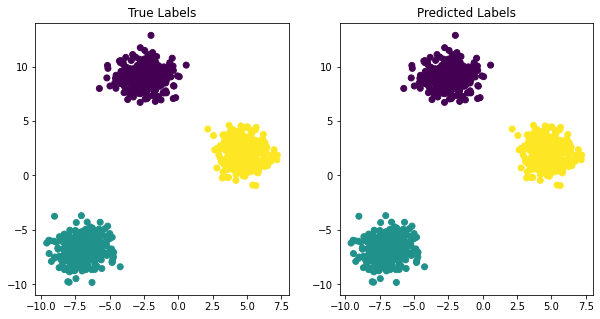

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate a synthetic dataset with 3 clusters
X, y = make_blobs(n_samples=1000, centers=3, random_state=42)

# Initialize the KMeans object with the number of clusters to form and iterations
kmeans = KMeans(n_clusters=3, max_iter=300)

# Fit the data to the KMeans object
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Use one-hot encoding to convert the labels into binary vectors
y = np.eye(3)[labels]

# Split the data into training and testing sets
split_index = int(0.8 * len(X))
X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

# Define the ANN model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model with a categorical cross-entropy loss and the Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training set
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on the testing set
accuracy = model.evaluate(X_test, y_test)[1]

print("Accuracy:", accuracy)

# Visualize the clustering and classification results
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original data points colored by their true labels
axs[0].scatter(X[:, 0], X[:, 1], c=y.argmax(axis=1))
axs[0].set_title("True Labels")

# Plot the data points colored by their predicted labels
predicted_labels = model.predict(X).argmax(axis=1)
axs[1].scatter(X[:, 0], X[:, 1], c=predicted_labels)
axs[1].set_title("Predicted Labels")

plt.show()
